In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from datetime import datetime, time
#import pandas_datareader.data as pdr
import pandas_datareader.data as pdr
import yfinance as yf

In [4]:
#yf.pdr_override()

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as ts 

In [75]:

today = datetime.now().date()
five_year_ago = today.replace(year = today.year-5)
ten_year_ago = today.replace(year = today.year-10)
twenty_year_ago = today.replace(year= today.year-20)
stock_symbol = "AAPL"
try:
    data =yf.download(stock_symbol, start=five_year_ago, end=today, rounding=True,multi_level_index=False)
    print(data.head())
except Exception as e:
    print(f"Error: {e}")


[*********************100%***********************]  1 of 1 completed

            Close   High    Low   Open     Volume
Date                                             
2020-02-26  71.02  72.29  69.53  69.53  198054800
2020-02-27  66.38  69.41  66.24  68.22  320605600
2020-02-28  66.34  67.56  62.22  62.43  426510000
2020-03-02  72.51  73.15  67.40  68.50  341397200
2020-03-03  70.21  73.77  69.36  73.69  319475600


In [77]:
data_return = pd.DataFrame(data['Close'], index=data.index, columns=['Close'])



In [78]:
data_return.head()

,Close
Date,
2020-02-26,71.02
2020-02-27,66.38
2020-02-28,66.34
2020-03-02,72.51
2020-03-03,70.21


In [79]:
data_return['daily_return'] = data_return['Close'].pct_change()
data_return.head()

,Close,daily_return
Date,,
2020-02-26,71.02,NaN
2020-02-27,66.38,-0.065334
2020-02-28,66.34,-0.000603
2020-03-02,72.51,0.093006
2020-03-03,70.21,-0.031720


In [80]:
data_return['log_return'] = np.log(data_return['Close']/data_return['Close'].shift(1))
data_return = data_return.dropna()


In [81]:
data_return.head()

,Close,daily_return,log_return
Date,,,
2020-02-27,66.38,-0.065334,-0.067566
2020-02-28,66.34,-0.000603,-0.000603
2020-03-02,72.51,0.093006,0.088931
2020-03-03,70.21,-0.031720,-0.032234
2020-03-04,73.47,0.046432,0.045386


In [82]:
def check_statioinary(df):
    stationary_result = ts.adfuller(df,autolag='AIC')
    print("ADF test statistic", stationary_result[0] )
    print("pvalue", stationary_result[1])
    print("Lag", stationary_result[2])
    print("critical values",stationary_result[4])


In [83]:
from statsmodels.tsa.stattools import kpss

In [84]:
def kpss_test(df):
    result = kpss(df, regression='c',nlags="auto")
    print("Tets statistic", result[0])
    print("p-value",result[1] )
    print("Lag", result[2])
    print("critical values",result[3])

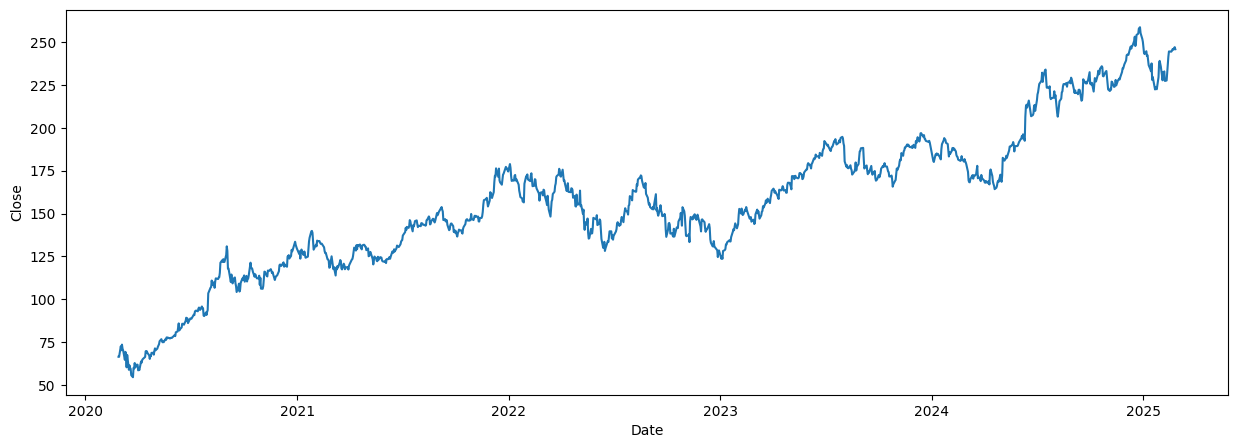

In [85]:
#Plot price data
fig, axs = plt.subplots( figsize=(15,5))
sns.lineplot(data_return['Close'])
plt.show()

In [86]:
#Usind AD Fuller test
check_statioinary(data['Close'])



ADF test statistic -1.080993028087265
pvalue 0.7225918453889228
Lag 0
critical values {'1%': -3.4355671297788666, '5%': -2.8638438984080117, '10%': -2.5679966213893057}


In [61]:
#using KPSS test
kpss_test(data['Close'])

Tets statistic 9.06339730843478
p-value 0.01
Lag 42
critical values {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/var/folders/dw/c3ntnt1x4kn59s38pldw62hr0000gn/T/ipykernel_30428/1382218819.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df, regression='c',nlags="auto")


In [87]:
#Differencing
data_return_diff = data_return['Close'].diff()
data_return_diff = data_return_diff.dropna()
data_return['data_diff'] = data_return_diff
print(data_return_diff)
check_statioinary(data_return_diff)

Date
2020-02-28   -0.04
2020-03-02    6.17
2020-03-03   -2.30
2020-03-04    3.26
2020-03-05   -2.38
              ... 
2025-02-19    0.40
2025-02-20    0.96
2025-02-21   -0.28
2025-02-24    1.55
2025-02-25   -1.21
Name: Close, Length: 1255, dtype: float64
ADF test statistic -35.828315232206386
pvalue 0.0
Lag 0
critical values {'1%': -3.4355754676859886, '5%': -2.8638475772391665, '10%': -2.5679985805677017}


In [88]:
#Log transform
data_return_log = np.log(data_return['Close'])
data_return_log = data_return_log.dropna()
print(data_return_log)
check_statioinary(data_return_log)

Date
2020-02-27    4.195396
2020-02-28    4.194793
2020-03-02    4.283724
2020-03-03    4.251491
2020-03-04    4.296877
                ...   
2025-02-19    5.500727
2025-02-20    5.504640
2025-02-21    5.503501
2025-02-24    5.509793
2025-02-25    5.504884
Name: Close, Length: 1256, dtype: float64
ADF test statistic -2.2242130151280275
pvalue 0.19757517670227526
Lag 0
critical values {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}


Plotting the returns

<Axes: xlabel='Date', ylabel='log_return'>

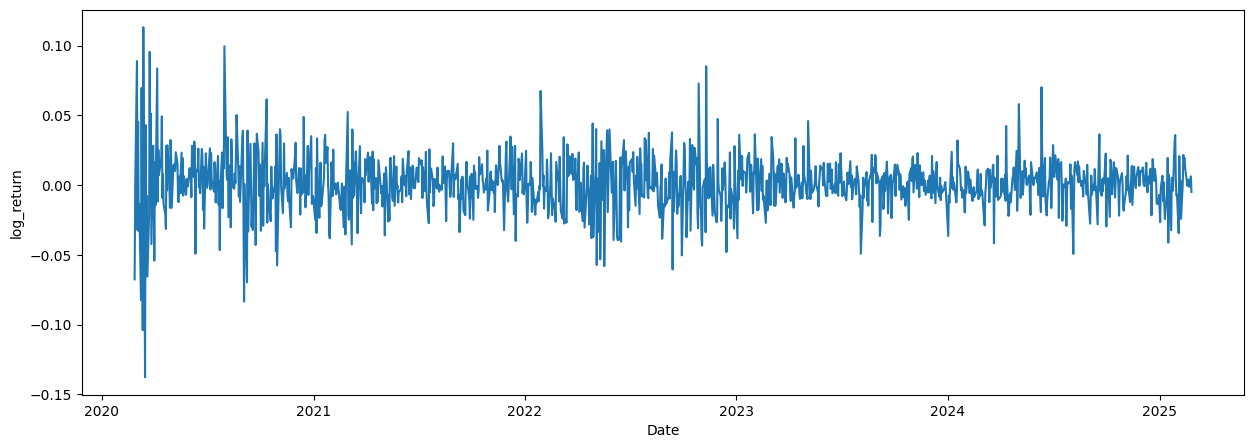

In [89]:
fig, axs = plt.subplots(figsize=(15,5))
sns.lineplot(data_return['log_return'])

In [90]:
data_return.head()

,Close,daily_return,log_return,data_diff
Date,,,,
2020-02-27,66.38,-0.065334,-0.067566,NaN
2020-02-28,66.34,-0.000603,-0.000603,-0.04
2020-03-02,72.51,0.093006,0.088931,6.17
2020-03-03,70.21,-0.031720,-0.032234,-2.30
2020-03-04,73.47,0.046432,0.045386,3.26


Text(0.5, 1.0, 'log return')

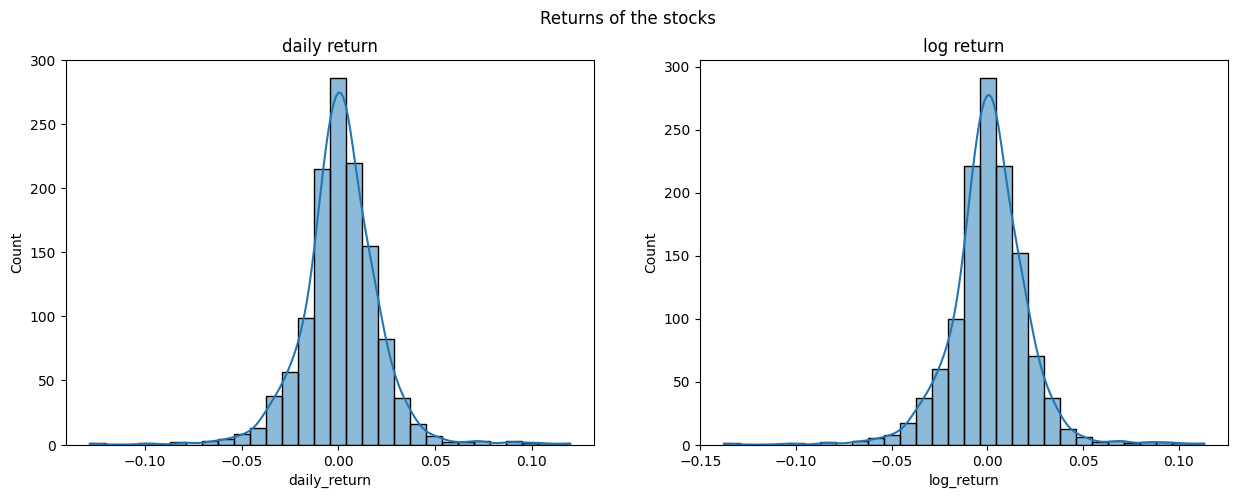

In [91]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Returns of the stocks")
sns.histplot(ax = axs[0],data=data_return, x = 'daily_return', bins=30,kde=True)
axs[0].set_title("daily return")
sns.histplot(ax = axs[1], data = data_return,x ='log_return', bins=30,kde=True)
axs[1].set_title("log return")



In [99]:
mean_daily_return = data_return['daily_return'].mean()
std_daily_return = data_return['daily_return'].std()

2.933183732590988

Calculating and  Plotting autocorrelation 

In [ ]:
#data_return['autocorr_20'] = data_return['Close'].rolling(window=20).apply(lambda x: x.autocorr())
#data_return.head(100)

,Close,daily_return,log_return,autocorr_20
Date,,,,
2005-02-28,1.35,0.007463,0.007435,NaN
2005-03-01,1.34,-0.007407,-0.007435,NaN
2005-03-02,1.33,-0.007463,-0.007491,NaN
2005-03-03,1.26,-0.052632,-0.054067,NaN
2005-03-04,1.29,0.023810,0.023530,NaN
...,...,...,...,...
2005-07-14,1.23,0.069565,0.067252,0.530396
2005-07-15,1.25,0.016260,0.016129,0.748827
2005-07-18,1.25,0.000000,0.000000,0.833673


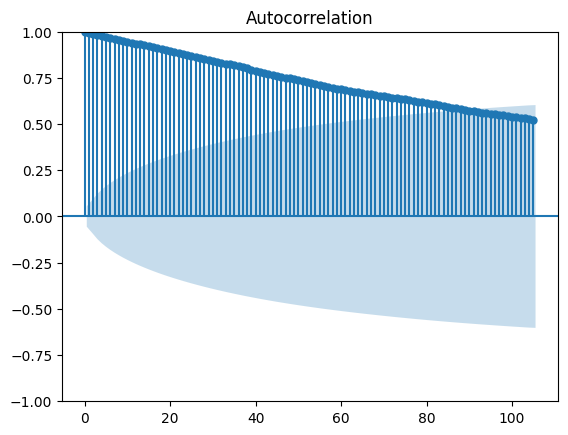

In [112]:
plot_acf(data_return['Close'], lags=105);

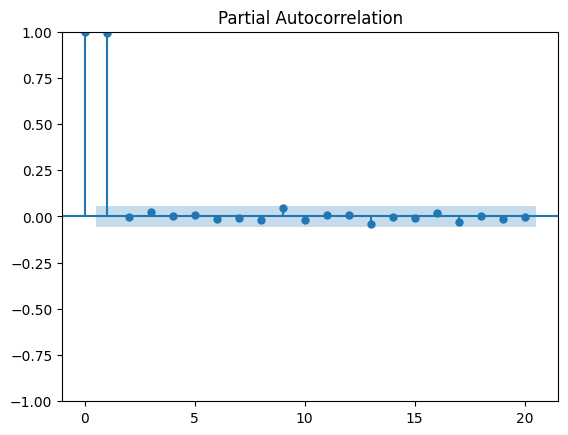

In [118]:
plot_pacf(data_return['Close'], lags=20);

Data Preprocessing

In [101]:
prices = data_return['daily_return'].values.reshape(-1,1)

In [100]:
from sklearn.preprocessing import StandardScaler

In [152]:
#data_daily_return = pd.DataFrame(data_return['daily_return'])
data_lstm = pd.DataFrame( index=data_return.index.values,columns=['y'])

In [153]:
print(data_lstm)

              y
2005-02-22  NaN
2005-02-23  NaN
2005-02-24  NaN
2005-02-25  NaN
2005-02-28  NaN
...         ...
2025-02-10  NaN
2025-02-11  NaN
2025-02-12  NaN
2025-02-13  NaN
2025-02-14  NaN

[5029 rows x 1 columns]


In [ ]:
#Normalise the data
scaler = StandardScaler()
data_lstm['y'] = scaler.fit_transform(data_return['daily_return'].to_frame())
print(data_lstm)



                   y
2005-02-22 -1.017326
2005-02-23  1.892671
2005-02-24  0.253150
2005-02-25 -0.059925
2005-02-28  0.251181
...              ...
2025-02-10 -0.055579
2025-02-11  1.020000
2025-02-12  0.843822
2025-02-13  0.913227
2025-02-14  0.568816

[5029 rows x 1 columns]


In [155]:
#spliting the data into training and testing set- 70% trainn data and 30% test data
train_size = int(len(data_lstm)*0.8)
train_data, test_data = data_lstm[:train_size],data_lstm[train_size:]

In [156]:
train_data

,y
2005-02-22,-1.017326
2005-02-23,1.892671
2005-02-24,0.253150
2005-02-25,-0.059925
2005-02-28,0.251181
...,...
2021-02-08,-0.005670
2021-02-09,-0.385096
2021-02-10,-0.285414
2021-02-11,-0.154918


In [157]:
train_data.shape[0]

4023

In [ ]:
train_data

In [114]:
def create_sequence(dataset):
    sequences = []
    labels = []
    start_idx = 0

    for stop_idx in range(50,len(dataset)): 
        sequences.append(dataset.iloc[start_idx:stop_idx])
        labels.append(dataset.iloc[stop_idx])
        start_idx += 1
    return (np.array(sequences),np.array(labels))

train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [172]:
X_train = train_data.index.values
y_train = train_data.loc[:,'y']

In [173]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [158]:
#Building LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam




In [174]:
model = Sequential([Input((2,1)),
                    LSTM(64),
                    Dense(32, activation='relu'),
                    Dense(32, activation = 'relu'),
                    Dense(1)])

model.compile(loss = 'mse',
              optimizer = Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, epochs = 100)

ValueError: Invalid dtype: datetime64[ns]

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_data.shape[0], train_data.shape[1])))

#model.add(Dropout(0.1))
model.add(Dense(3))
model.add(Dense(3,activation='softmax'))
   

IndexError: tuple index out of range